In [29]:
from tensorflow import keras

In [30]:
# h5 model 불러오기

model = keras.models.load_model("../Data/best_cnn_model.h5")

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [32]:
# model의 layer 확인하기
model.layers

### kernel size (3X3)로 구성된 이미지 보기

In [33]:
# 32개의 노드로 구성된 Layer 선택
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [34]:
# 가중치 보기

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.013314089 0.2553119


In [35]:
conv_weights.shape

(3, 3, 1, 32)

In [36]:
import matplotlib.pyplot as plt

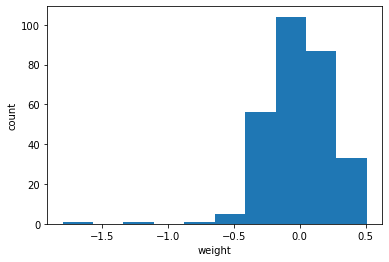

In [37]:
# 시각화 해보기

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

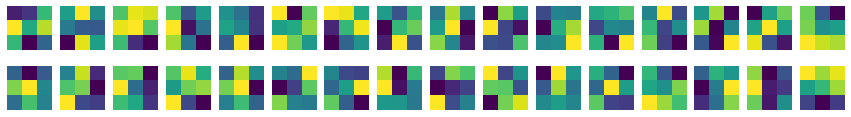

In [38]:
# 이미지로 확인하기

fig, axs = plt.subplots( 2,16, figsize= (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j])
        axs[i,j].axis('off')

plt.show()

---
### 특성맵 시각화

In [39]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [40]:
# Model 불러오기
conv_acti = keras.models.Model(model.input, model.layers[0].output)

In [41]:
(train_input, train_target) , (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

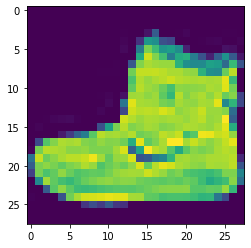

In [42]:
plt.imshow(train_input[0])
plt.show()

In [43]:
inputs = train_input[:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 90ms/step
(1, 28, 28, 32)


2022-07-28 11:01:34.220066: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


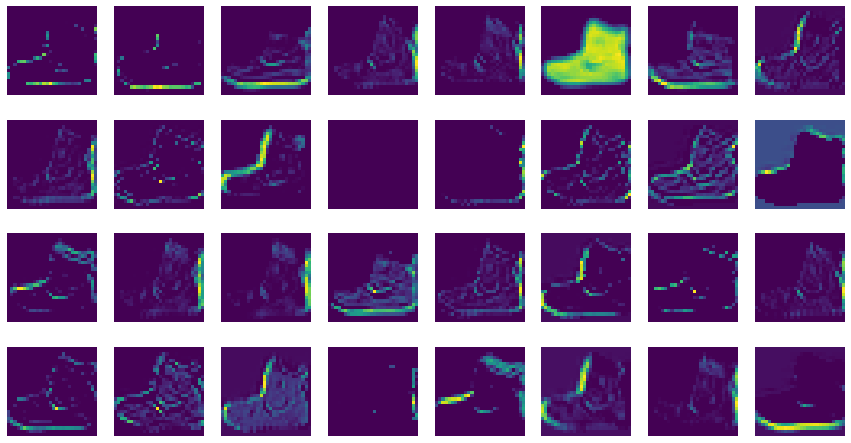

In [47]:
# 이미지로 확인하기

fig, axs = plt.subplots( 4,8, figsize= (15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')

plt.show()

In [50]:
# Model 불러오기

conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [52]:

feature_maps = conv2_acti.predict(train_input[:1].reshape(-1,28,28,1)/255.0)
print(feature_maps.shape)

1/1 [==============================] - 0s 11ms/step
(1, 14, 14, 64)


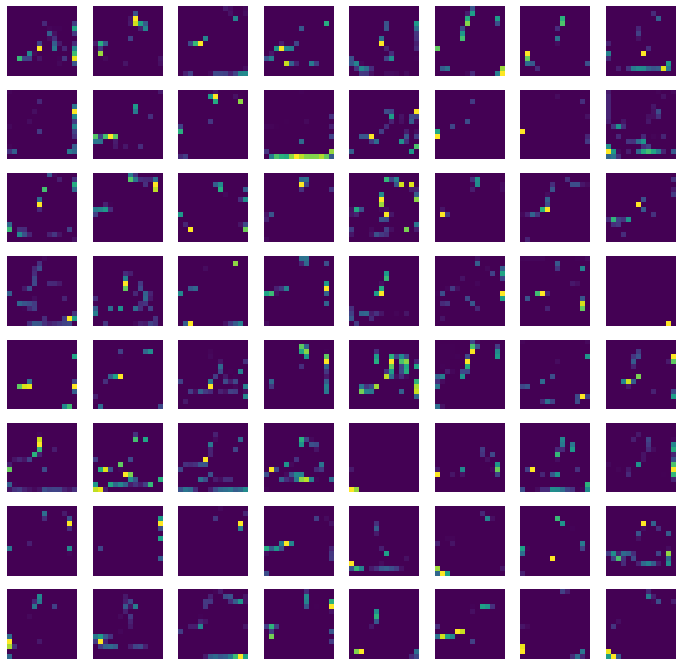

In [56]:
# 이미지로 확인하기

fig, axs = plt.subplots( 8,8, figsize= (12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')

plt.show()

1/1 [==============================] - 0s 23ms/step
(1, 14, 14, 32)


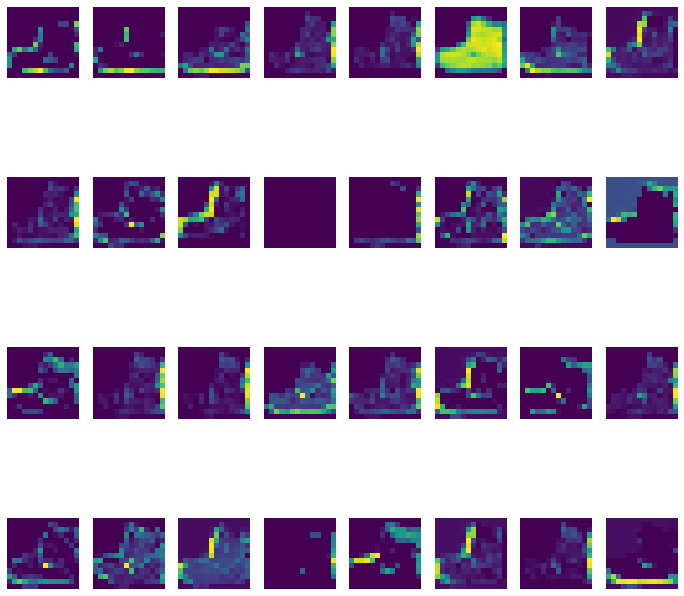

In [57]:
# Model 불러오기

conv2_acti = keras.models.Model(model.input, model.layers[1].output)

feature_maps = conv2_acti.predict(train_input[:1].reshape(-1,28,28,1)/255.0)
print(feature_maps.shape)
# 이미지로 확인하기

fig, axs = plt.subplots( 4,8, figsize= (12,12))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')

plt.show()